In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import csv

In [3]:
df = pd.read_csv('데이터셋/pulsar_stars.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [4]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [5]:
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [6]:
with open('데이터셋/pulsar_stars.csv') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)
    rows = []
    for row in csvreader:
        rows.append(row)
        
data = np.asarray(rows, dtype='float32')
input_cnt, output_cnt = 8, 1

In [7]:
data[:][0]

array([140.5625    ,  55.68378   ,  -0.23457141,  -0.6996484 ,
         3.1998327 ,  19.110426  ,   7.9755316 ,  74.242226  ,
         0.        ], dtype=float32)

# 정규화를 안시켜보고 진행

In [8]:
train_ratio = 0.8
mb_size = 32
test_begin_index = int(data.shape[0] * train_ratio)
print(data.shape[0])
print('test_begin_index:', test_begin_index)

17898
test_begin_index: 14318


In [9]:
shuffle_map = np.arange(data.shape[0])

np.random.seed(1234)
np.random.shuffle(shuffle_map)
print(shuffle_map[:5])

[ 9375  1570 15443 14077  6079]


In [10]:
train_data = data[shuffle_map[:test_begin_index]]
test_data = data[shuffle_map[test_begin_index:]]

print(train_data.shape)
print(test_data.shape)

(14318, 9)
(3580, 9)


In [11]:
train_x, train_y = train_data[:, :-output_cnt], train_data[:, -output_cnt:]
test_x, test_y = test_data[:, :-output_cnt], test_data[:, -output_cnt:]

In [12]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(14318, 8)
(14318, 1)
(3580, 8)
(3580, 1)


In [13]:
pulsar_DNN_drop_sigmoid = tf.keras.Sequential([
                                               tf.keras.layers.Dense(units=128, activation='relu', input_shape = [8,]),
                                               tf.keras.layers.Dense(units=64, activation='relu'),
                                               tf.keras.layers.Dropout(rate = 0.5),
                                               tf.keras.layers.Dense(units=32, activation='relu'),
                                               tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [14]:
pulsar_DNN_drop_sigmoid.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [15]:
pulsar_DNN_sigmoid = tf.keras.Sequential([
                                               tf.keras.layers.Dense(units=128, activation='relu', input_shape = [8,]),
                                               tf.keras.layers.Dense(units=64, activation='relu'),
                                               #tf.keras.layers.Dropout(rate = 0.5),
                                               tf.keras.layers.Dense(units=32, activation='relu'),
                                               tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [16]:
pulsar_DNN_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [17]:
pulsar_DNN_drop_sigmoid.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                                loss = 'binary_crossentropy',
                                metrics = ['accuracy'])

In [18]:
history = pulsar_DNN_drop_sigmoid.fit(train_x, train_y,
                                      batch_size = 32,
                                      epochs     = 25,
                                      validation_split = 0.2,
                                      callbacks = [tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/25
358/358 [==============================] - 1s 1ms/step - loss: 0.3315 - accuracy: 0.9461 - val_loss: 0.0778 - val_accuracy: 0.9759
Epoch 2/25
358/358 [==============================] - 0s 998us/step - loss: 0.1313 - accuracy: 0.9666 - val_loss: 0.0739 - val_accuracy: 0.9791
Epoch 3/25
358/358 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9690 - val_loss: 0.0897 - val_accuracy: 0.9763
Epoch 4/25
358/358 [==============================] - 1s 1ms/step - loss: 0.1096 - accuracy: 0.9705 - val_loss: 0.1686 - val_accuracy: 0.9777
Epoch 5/25
358/358 [==============================] - 1s 1ms/step - loss: 0.1078 - accuracy: 0.9696 - val_loss: 0.0868 - val_accuracy: 0.9759


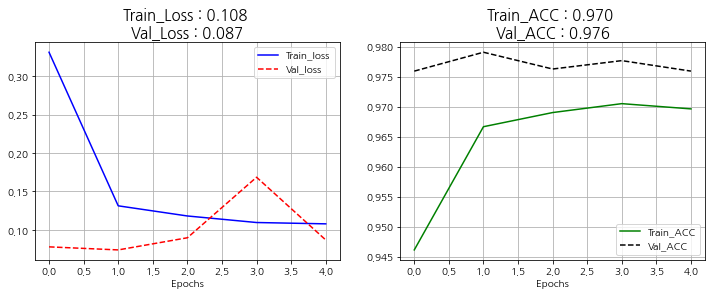

In [19]:
val_accuracy = history.history['val_accuracy']
accuracy     = history.history['accuracy']

val_loss = history.history['val_loss']
loss     = history.history['loss']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

plt.plot(history.history['loss'], 'b-',      label = 'Train_loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val_loss')

plt.xlabel('Epochs')

plt.title("Train_Loss : {:.3f} \nVal_Loss : {:.3f}".format(loss[-1], val_loss[-1]),
          fontsize = 15)

plt.legend()
plt.grid()

plt.subplot(1,2,2)

plt.plot(history.history['accuracy'], 'g-',      label = 'Train_ACC')
plt.plot(history.history['val_accuracy'], 'k--', label = 'Val_ACC')
plt.xlabel('Epochs')

plt.title("Train_ACC : {:.3f} \nVal_ACC : {:.3f}".format(accuracy[-1], val_accuracy[-1]),
          fontsize = 15)

plt.legend()
plt.grid()
plt.show()

In [20]:
pred_Y = pulsar_DNN_drop_sigmoid.predict(test_x)
pred_Y = np.round(pred_Y,1)
print(pred_Y[:20])

[[0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.1]
 [0. ]
 [0. ]
 [0. ]
 [0.1]
 [0. ]
 [0. ]
 [0. ]
 [0.1]
 [0. ]
 [0. ]
 [0.1]
 [0. ]
 [0. ]
 [0. ]
 [0. ]]


In [21]:
print(pd.DataFrame(pred_Y).value_counts())
print(pd.DataFrame(test_y).value_counts())

0.0    2646
0.1     518
1.0     159
0.2      73
0.3      45
0.9      36
0.4      30
0.5      26
0.8      18
0.6      15
0.7      14
dtype: int64
0.0    3258
1.0     322
dtype: int64


In [22]:
# 예측값을 참(1)으로 예측했냐? 
est_yes = np.greater(pred_Y, 0.5)
print("est_yes : \n", est_yes[:5])

# 실제값을 참(1)으로 예측했냐?
ans_yes = np.greater(test_y, 0.5)
print("ans_yes : \n", ans_yes[:5])

est_yes : 
 [[False]
 [False]
 [False]
 [False]
 [False]]
ans_yes : 
 [[False]
 [False]
 [False]
 [False]
 [False]]


In [23]:
est_no = np.logical_not(est_yes)
print("est_no : \n", est_no[:5])
ans_no = np.logical_not(ans_yes)
print("ans_no : \n",ans_no[:5])

est_no : 
 [[ True]
 [ True]
 [ True]
 [ True]
 [ True]]
ans_no : 
 [[ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [24]:
tp = np.sum(np.logical_and(est_yes, ans_yes))
print("TP : ", tp)

tn = np.sum(np.logical_and(est_no, ans_no))
print("TN : ", tn)

fp = np.sum(np.logical_and(ans_no, est_yes))
print("FP : ", fp)

fn = np.sum(np.logical_and(ans_yes, est_no))
print("FN : ", fn)

TP :  227
TN :  3243
FP :  15
FN :  95


In [31]:
accuracy = safe_div((tp + tn), (tp + tn + fp + fn))
print("accuracy : ", accuracy)

precision = safe_div((tp) , (tp + fp))
print("precision : ", precision)

recall = safe_div((tp) , (tp + fn))
print("recall : ", recall)

f1 = 2 * safe_div((recall * precision), (recall + precision))
print("F1-Score : ", f1)

accuracy :  0.9692737430167597
precision :  0.9380165289256198
recall :  0.7049689440993789
F1-Score :  0.8049645390070923


In [32]:
precision = tp / (tp + fp)
print("precision :", precision) 

recall = tp / (tp + fn)
print("recall : ", recall)

precision : 0.9380165289256198
recall :  0.7049689440993789


In [33]:
# 안전한 나눗셈 함수 만들기
def safe_div(p,q):
    p, q = float(p), float(q)

    if np.abs(q) < 1.0e-20:
        return np.sign(p)
    return p / q

In [34]:
a = [np.exp(i) for i in range(1,11)]

In [40]:
a_TF = np.greater(a,1000)
a_TF

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [41]:
a_TF_not = np.logical_not(a_TF)
a_TF_not

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False])